# Note

### Neural Network Model
- Model Class is located [keras_model.py](https://github.com/DSEI21000-S21/project-product-price-prediction/blob/main/final/model_evaluation/keras_model.py)
- Train locally because of the large data sample need to train over night
    - Training detail can look at [train_nn.py](https://github.com/DSEI21000-S21/project-product-price-prediction/blob/main/final/train_nn.py)
    
### Sample Dataset
- The computer don't have enough memory to handle the trainning for entire dataset
    - Entire Dataset: 1481082 samples
- Random sample 20% data from the entire dataset and do 70%/30% Train-Test Split

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import lightgbm as lgbm
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


from final.model_evaluation.keras_model import neural_network
from final.helper.load_data import read_model_struture,read_np_file
from final.model_evaluation.visualizations import plot_loss
from final.model_evaluation.regression_cvs import find_train_best_model
from final.model_evaluation.regression_evaluation import reg_evaluation, get_ori_price
from final.helper.save_data import save_np_file

Using TensorFlow backend.


# Load preprocess data

In [2]:
x_skb_select_train = np.load("nn_data/select_k_best_train.npy")
x_skb_select_test = np.load("nn_data/select_k_best_test.npy")
y_train = np.load("nn_data/y_train.npy")
y_test = np.load("nn_data/y_test.npy")

In [3]:
x_skb_select_train.shape

(207351, 2000)

In [4]:
x_skb_select_test.shape

(88865, 2000)

# Load NN Model and Evaluation 
- Small and Large NN

## Small NN Model train with selected 2000 best value 

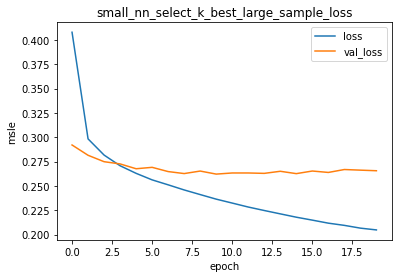

In [7]:
small_select_model_name = "select_k_best_NN_64_dr1e-01_16_lr1e-03"
small_skb_select_loss = read_np_file(dir=small_select_model_name, filename=small_select_model_name+"_loss.npy")[:,:,0]

plot_loss(small_skb_select_loss[:,0],small_skb_select_loss[:,1], 
          title="small_nn_select_k_best_large_sample_loss")

In [8]:
print("minimum test msle: ",small_skb_select_loss[:,1].min())
print("minimum test msle at epoch: ",small_skb_select_loss[:,1].argmin())

minimum test msle:  0.2621275982059317
minimum test msle at epoch:  9


In [9]:
# load model
small_select_k_best_model = neural_network(model_name = small_select_model_name+"_ep10.h5")


loading model


In [10]:
small_select_k_best_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                128064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 129,121
Trainable params: 129,121
Non-trainable params: 0
_________________________________________________________________


In [11]:
small_skb_select_train_pred = small_select_k_best_model.predict(x_skb_select_train)
small_skb_select_test_pred = small_select_k_best_model.predict(x_skb_select_test)

Result of using select_k_best_NN_64_dr1e-01_16_lr1e-03


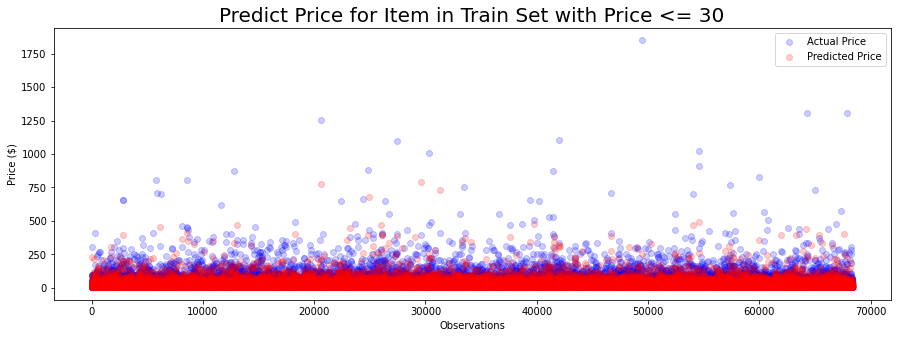

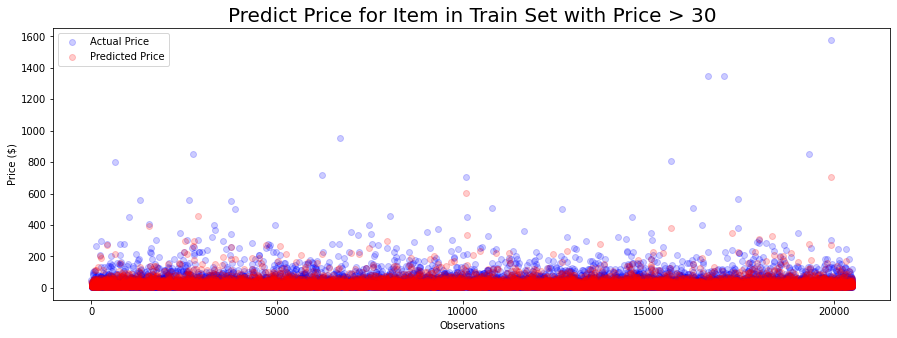

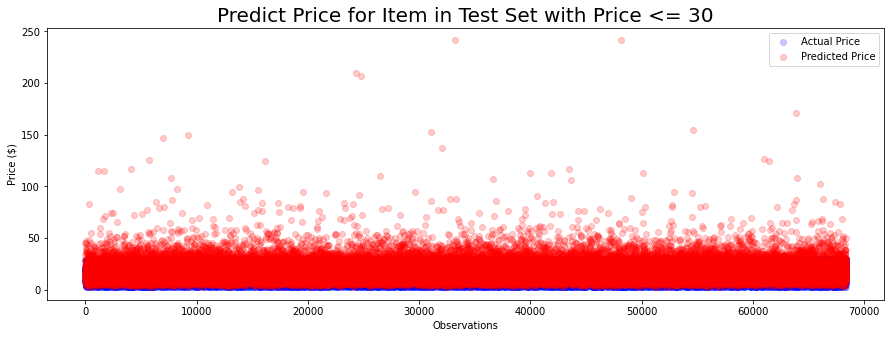

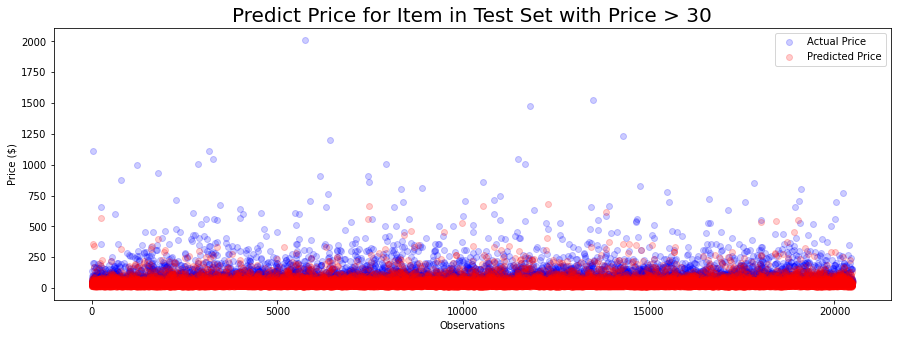

Max Percentage Difference: 1402.72 ---- Original Price 4.00, Predict Price 60.11 
Min Percentage Difference: 0.00 ---- Original Price 8.00, Predict Price 8.00 
Max Percentage Difference: 1402.72 ---- Original Price 4.00, Predict Price 60.11 
Min Percentage Difference: 0.00 ---- Original Price 8.00, Predict Price 8.00 
Max Percentage Difference: 370.88 ---- Original Price 46.00, Predict Price 216.60 
Min Percentage Difference: 0.01 ---- Original Price 71.00, Predict Price 71.00 
Max Percentage Difference: 1446.83 ---- Original Price 4.00, Predict Price 61.87 
Min Percentage Difference: 0.00 ---- Original Price 49.00, Predict Price 49.00 
Max Percentage Difference: 1446.83 ---- Original Price 4.00, Predict Price 61.87 
Min Percentage Difference: 0.00 ---- Original Price 16.00, Predict Price 16.00 
Max Percentage Difference: 391.37 ---- Original Price 40.00, Predict Price 196.55 
Min Percentage Difference: 0.00 ---- Original Price 49.00, Predict Price 49.00 


In [12]:
result_df = small_select_k_best_model.evaluation(y_train, small_skb_select_train_pred, 
                               y_test, small_skb_select_test_pred, price_split=30,
                                                print_result = False)

In [13]:
result_df

,Max Percentage Diff,Min Percentage Diff,RMSLE,R^2,MAPE,MAE
All Train,1402.716732,0.000036,0.468648,0.604045,40.081438,10.497108
Train with Price <= 30,1402.716732,0.000036,0.391371,0.296427,40.652370,5.002221
Train with Price > 30,370.875184,0.006866,0.663556,-0.670159,38.185695,28.742567
All Test,1446.828461,0.000428,0.511984,0.530287,44.632724,11.527225
Test with Price <= 30,1446.828461,0.001878,0.428102,0.166871,45.645259,5.525121
Test with Price > 30,391.367455,0.000428,0.724778,-0.959242,41.253472,31.558749


## NN Model train with selected 2000 best value 

In [14]:
select_model_name = "select_k_best_NN_256_dr1e-01_64_dr1e-01_16_dr1e-01_lr1e-03"

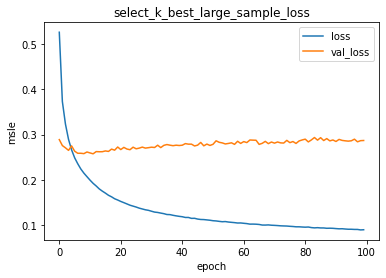

In [13]:
skb_select_loss = read_np_file(dir=select_model_name, filename=select_model_name+"_loss.npy")[:,:,0]
plot_loss(skb_select_loss[:,0],skb_select_loss[:,1], title="select_k_best_large_sample_loss")

In [14]:
print("minimum test msle: ",skb_select_loss[:,1].min())
print("minimum test msle at epoch: ",skb_select_loss[:,1].argmin())

minimum test msle:  0.2575106723697387
minimum test msle at epoch:  11


In [15]:
# load model
select_k_best_model = neural_network(model_name = select_model_name+"_ep10.h5")

loading model


In [16]:
select_k_best_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               512256    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [16]:
skb_select_train_pred = select_k_best_model.predict(x_skb_select_train)
skb_select_test_pred = select_k_best_model.predict(x_skb_select_test)

Result of using select_k_best_NN_256_dr1e-01_64_dr1e-01_16_dr1e-01_lr1e-03


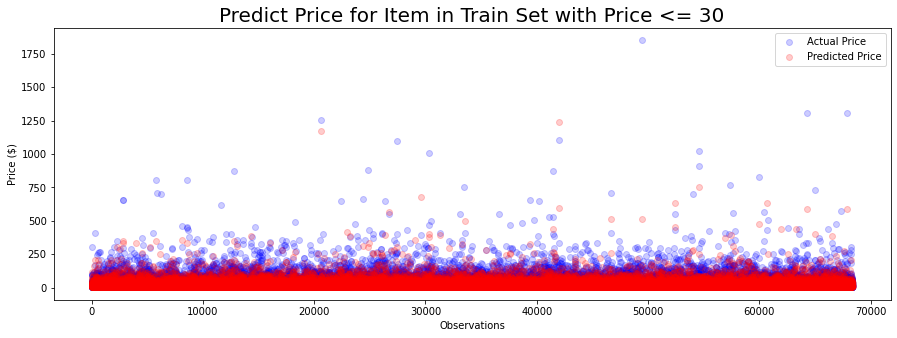

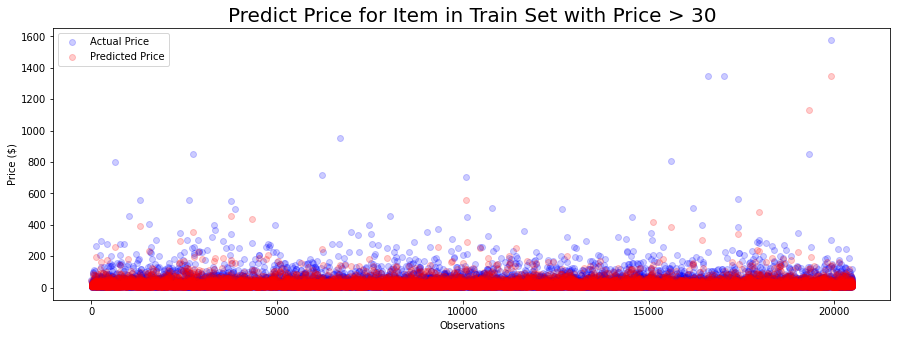

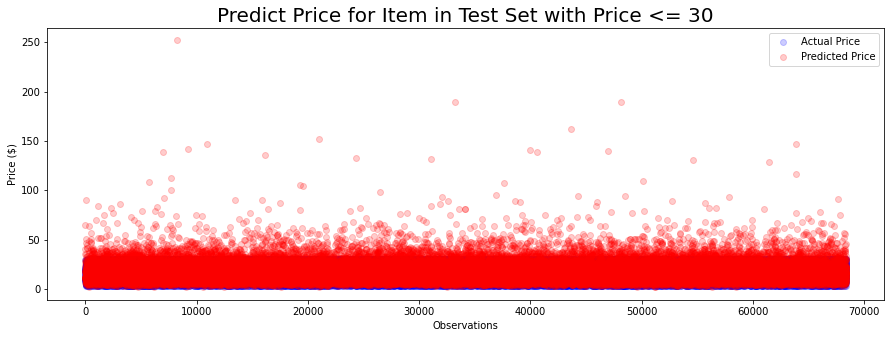

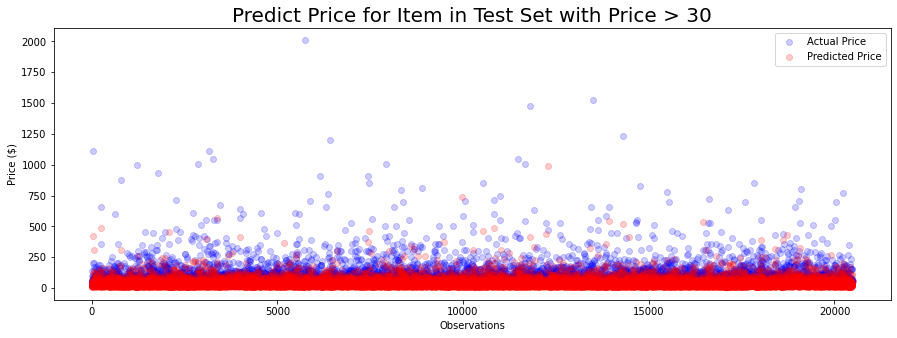

Max Percentage Difference: 1032.36 ---- Original Price 3.00, Predict Price 33.97 
Min Percentage Difference: 0.00 ---- Original Price 34.00, Predict Price 34.00 
Max Percentage Difference: 1032.36 ---- Original Price 3.00, Predict Price 33.97 
Min Percentage Difference: 0.00 ---- Original Price 12.00, Predict Price 12.00 
Max Percentage Difference: 275.24 ---- Original Price 41.00, Predict Price 153.85 
Min Percentage Difference: 0.00 ---- Original Price 34.00, Predict Price 34.00 
Max Percentage Difference: 2464.70 ---- Original Price 3.00, Predict Price 76.94 
Min Percentage Difference: 0.00 ---- Original Price 65.00, Predict Price 65.00 
Max Percentage Difference: 2464.70 ---- Original Price 3.00, Predict Price 76.94 
Min Percentage Difference: 0.00 ---- Original Price 8.00, Predict Price 8.00 
Max Percentage Difference: 408.20 ---- Original Price 41.00, Predict Price 208.36 
Min Percentage Difference: 0.00 ---- Original Price 65.00, Predict Price 65.00 


In [17]:
result_df = select_k_best_model.evaluation(y_train, skb_select_train_pred, 
                               y_test, skb_select_test_pred, price_split=30, 
                                           print_result = False)

In [18]:
result_df

,Max Percentage Diff,Min Percentage Diff,RMSLE,R^2,MAPE,MAE
All Train,1032.357534,0.000258,0.429313,0.667723,33.725998,9.496039
Train with Price <= 30,1032.357534,0.001129,0.347537,0.445204,33.047767,4.316180
Train with Price > 30,275.243620,0.000258,0.628690,-0.499256,35.978026,26.695463
All Test,2464.702861,0.000235,0.511397,0.531363,41.413697,11.406620
Test with Price <= 30,2464.702861,0.000614,0.411984,0.228425,41.217017,5.242366
Test with Price > 30,408.196054,0.000235,0.753583,-1.118074,42.070099,31.979306


## NN Model train with all value 

In [19]:
all_model_name = "all_data_NN_256_dr1e-01_64_dr1e-01_16_dr1e-01_lr1e-03"

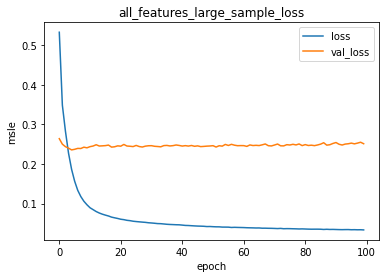

In [20]:
all_loss = read_np_file(dir=all_model_name, filename=all_model_name+"_loss.npy")[:,:,0]
plot_loss(all_loss[:,0],all_loss[:,1], title="all_features_large_sample_loss")

In [22]:
print("minimum test msle: ",all_loss[:,1].min())
print("minimum test msle at epoch: ",all_loss[:,1].argmin())

minimum test msle:  0.23555320539794025
minimum test msle at epoch:  4


In [21]:
# load model
all_model = neural_network(model_name = all_model_name+"_ep10.h5")
all_model.model.summary()

loading model
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               3033344   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)  

In [22]:
all_train_pred = read_np_file(dir=all_model_name, filename="all_y_train.npy")
all_test_pred = read_np_file(dir=all_model_name, filename="all_y_test.npy")

Result of using all_data_NN_256_dr1e-01_64_dr1e-01_16_dr1e-01_lr1e-03


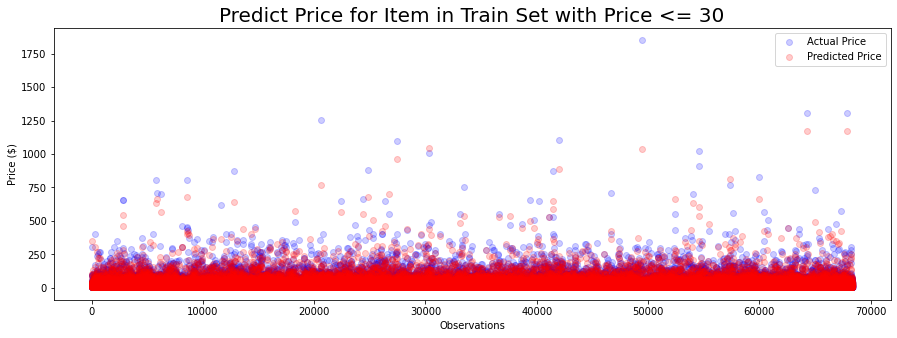

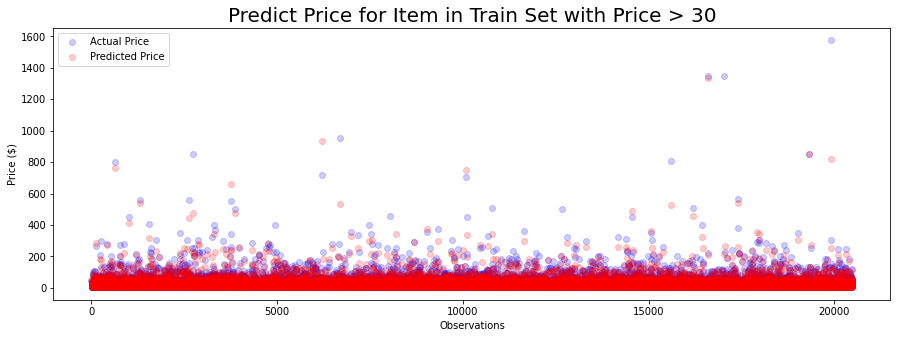

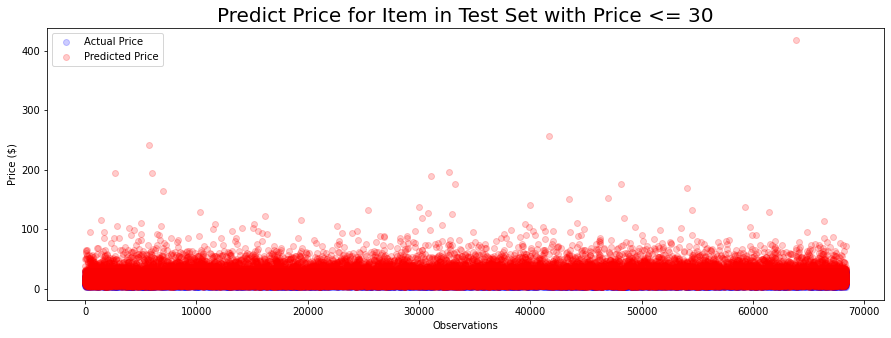

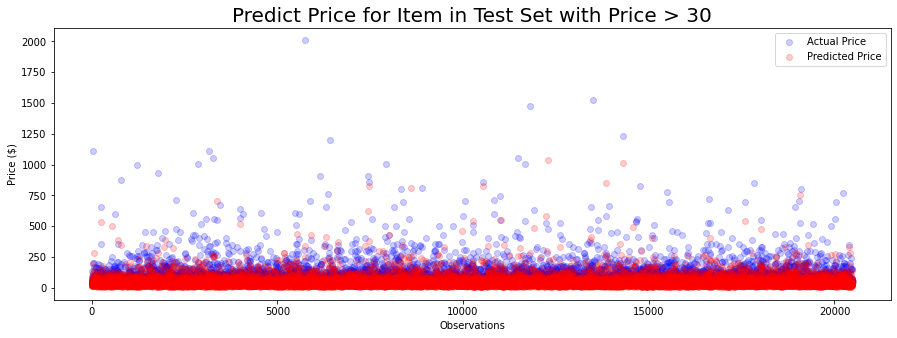

Max Percentage Difference: 1350.23 ---- Original Price 4.00, Predict Price 58.01 
Min Percentage Difference: 0.00 ---- Original Price 13.00, Predict Price 13.00 
Max Percentage Difference: 1350.23 ---- Original Price 4.00, Predict Price 58.01 
Min Percentage Difference: 0.00 ---- Original Price 13.00, Predict Price 13.00 
Max Percentage Difference: 137.94 ---- Original Price 56.00, Predict Price 133.25 
Min Percentage Difference: 0.00 ---- Original Price 55.00, Predict Price 55.00 
Max Percentage Difference: 3826.25 ---- Original Price 5.00, Predict Price 196.31 
Min Percentage Difference: 0.00 ---- Original Price 18.00, Predict Price 18.00 
Max Percentage Difference: 3826.25 ---- Original Price 5.00, Predict Price 196.31 
Min Percentage Difference: 0.00 ---- Original Price 18.00, Predict Price 18.00 
Max Percentage Difference: 953.37 ---- Original Price 31.00, Predict Price 326.54 
Min Percentage Difference: 0.00 ---- Original Price 32.00, Predict Price 32.00 


In [23]:
result_df = all_model.evaluation(y_train, all_train_pred, y_test, all_test_pred, price_split=30,
                                                print_result = False)

In [24]:
result_df

,Max Percentage Diff,Min Percentage Diff,RMSLE,R^2,MAPE,MAE
All Train,1350.226593,0.000007,0.125056,0.971806,8.828346,2.577293
Train with Price <= 30,1350.226593,0.000007,0.115946,0.938249,8.789397,1.161263
Train with Price > 30,137.938472,0.000180,0.151424,0.913025,8.957674,7.279140
All Test,3826.245728,0.001409,0.501146,0.549962,45.682647,10.736394
Test with Price <= 30,3826.245728,0.001409,0.458890,0.042730,49.067945,5.998029
Test with Price > 30,953.369042,0.001663,0.621721,-0.441683,34.384496,26.550294


# Traditional Model

## Light GBM Regressor

In [27]:
classifier = lgbm.LGBMRegressor()
parameters = {'max_depth': [2,4,6,8,10],
              'learning_rate': [0.0001,0.001, 0.01, 0.1, 0.2],
              'n_estimators': [100, 200, 500, 1000,1500]
             }

Best Estimator LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=6,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1500, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Best Parameters:  {'n_estimators': 1500, 'max_depth': 6, 'learning_rate': 0.2}
Best Score:  -0.25768103778066276
Result of using Feature from select k best model


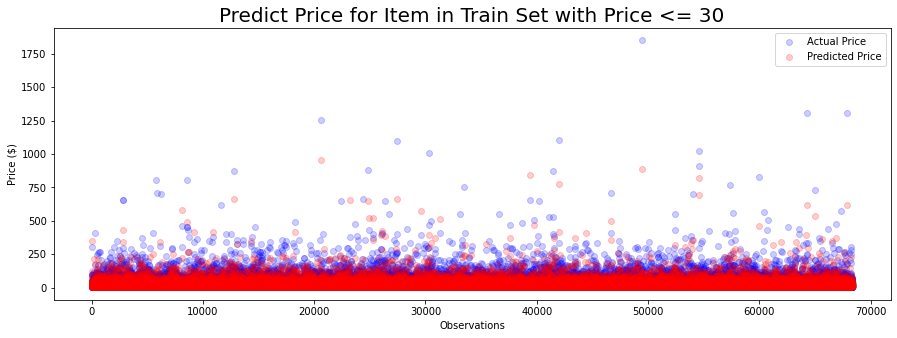

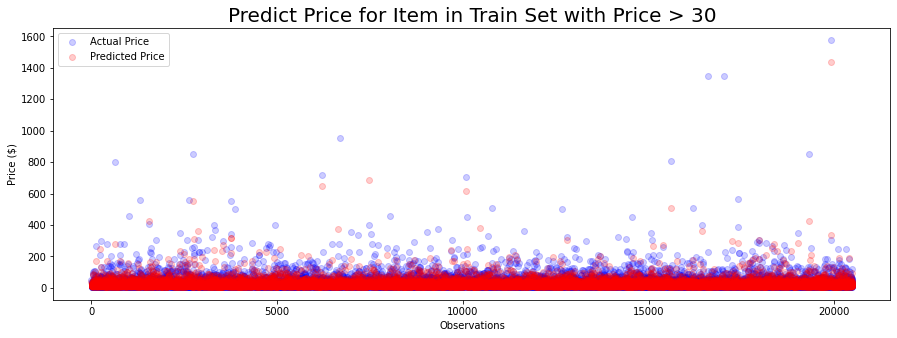

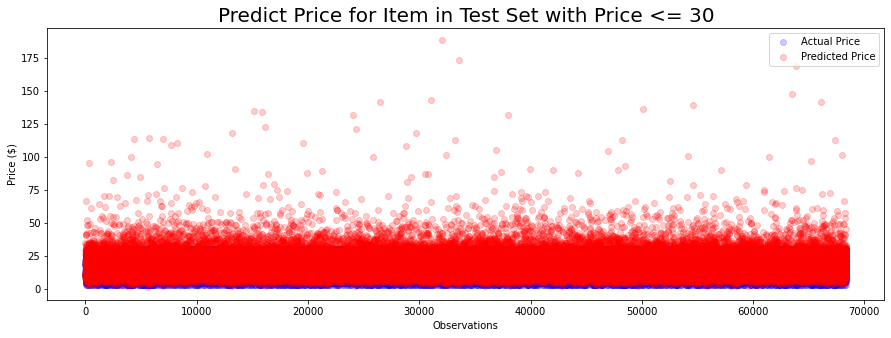

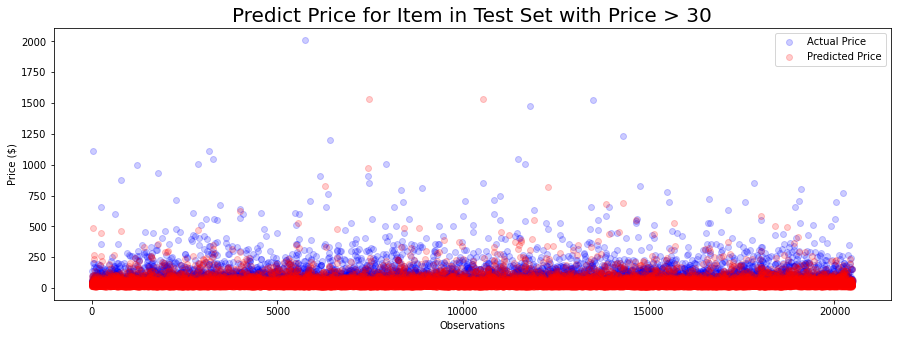

None
Max Percentage Difference:  779.8984521247422
With Original Price 10.00, Predict Price 87.99: 
Min Percentage Difference:  0.0001166417050542505
With Original Price 11.00, Predict Price 11.00: 
[     0      1      2 ... 207348 207349 207350]
Max Percentage Difference:  779.8984521247422
With Original Price 10.00, Predict Price 87.99: 
Min Percentage Difference:  0.0001166417050542505
With Original Price 11.00, Predict Price 11.00: 
[     3      5     12 ... 207337 207343 207347]
Max Percentage Difference:  313.3909714417103
With Original Price 31.00, Predict Price 128.15: 
Min Percentage Difference:  0.000533187927974733
With Original Price 44.00, Predict Price 44.00: 
Max Percentage Difference:  1909.326683762899
With Original Price 5.00, Predict Price 100.47: 
Min Percentage Difference:  0.00010866707148338148
With Original Price 10.00, Predict Price 10.00: 
Max Percentage Difference:  1909.326683762899
With Original Price 5.00, Predict Price 100.47: 
Min Percentage Difference: 

In [39]:
lgbm_train_pred, lgbm_test_pred = find_train_best_model(classifier, parameters, x_skb_select_train, y_train, 
                      x_skb_select_test, y_test, 
                      data_name="Feature from select k best model", price_split=30,
                                                print_result = False)

In [40]:
save_np_file(dir = "data", filename="select_k_best_lgbm_train_pred.npy", data=lgbm_train_pred)
save_np_file(dir = "data", filename="select_k_best_lgbm_test_pred.npy", data=lgbm_test_pred)

In [25]:
lgbm_train_pred  = np.load("data/select_k_best_lgbm_train_pred.npy")
lgbm_test_pred  = np.load("data/select_k_best_lgbm_test_pred.npy")

--------------------------------------------------
For All Price
Train Result ----------
Max Percentage Difference: 779.90 ---- Original Price 10.00, Predict Price 87.99 
Min Percentage Difference: 0.00 ---- Original Price 11.00, Predict Price 11.00 
RMSLE is  0.4253734197756737
R^2  is  0.6737939430518727
Mean Absolute Percentage Error is  36.2497609476156
Mean Absolute Error is  9.285372512280356

Test Result ----------
Max Percentage Difference: 1909.33 ---- Original Price 5.00, Predict Price 100.47 
Min Percentage Difference: 0.00 ---- Original Price 10.00, Predict Price 10.00 
RMSLE is  0.5028467171397414
R^2 is  0.5469030514330728
Mean Absolute Percentage Error is  43.929880436249114
Mean Absolute Error is  11.300958862765006
--------------------------------------------------
For price under $30
Train Result ----------
Max Percentage Difference: 779.90 ---- Original Price 10.00, Predict Price 87.99 
Min Percentage Difference: 0.00 ---- Original Price 11.00, Predict Price 11.00 
R

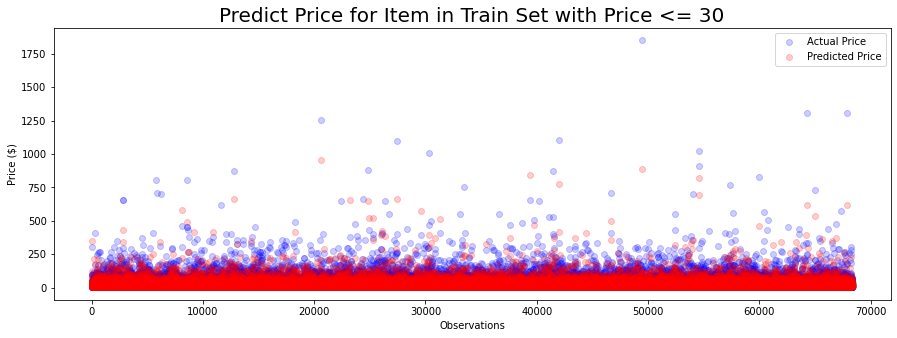

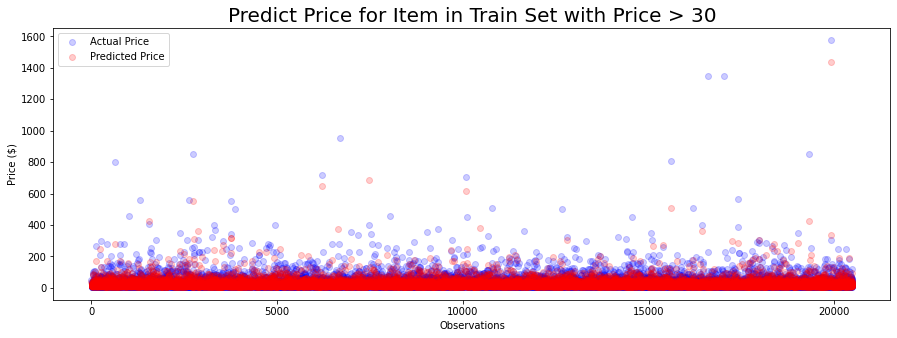

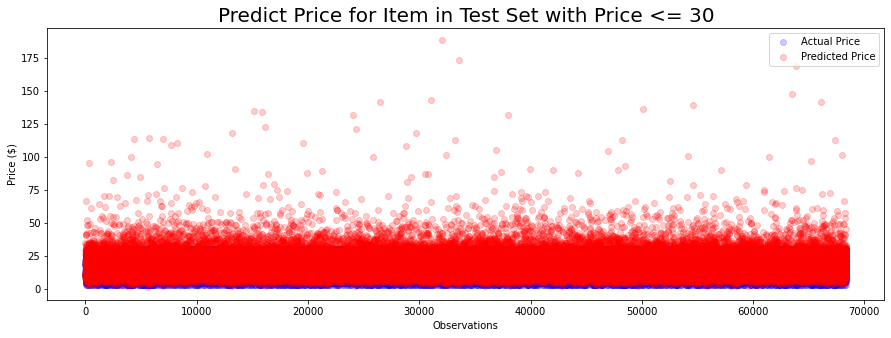

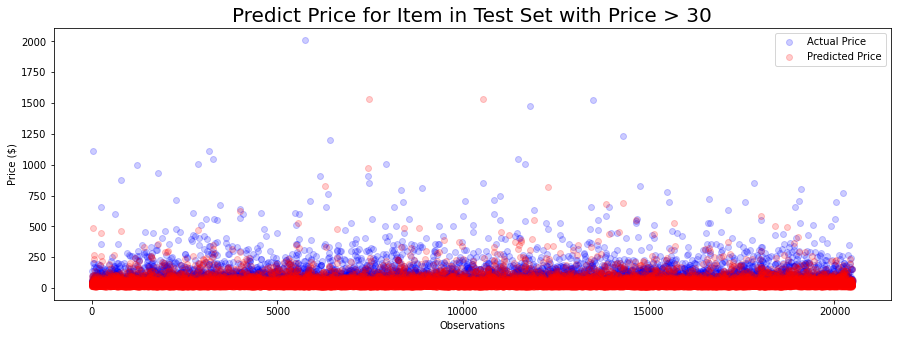

Max Percentage Difference: 779.90 ---- Original Price 10.00, Predict Price 87.99 
Min Percentage Difference: 0.00 ---- Original Price 11.00, Predict Price 11.00 
Max Percentage Difference: 779.90 ---- Original Price 10.00, Predict Price 87.99 
Min Percentage Difference: 0.00 ---- Original Price 11.00, Predict Price 11.00 
Max Percentage Difference: 313.39 ---- Original Price 31.00, Predict Price 128.15 
Min Percentage Difference: 0.00 ---- Original Price 44.00, Predict Price 44.00 
Max Percentage Difference: 1909.33 ---- Original Price 5.00, Predict Price 100.47 
Min Percentage Difference: 0.00 ---- Original Price 10.00, Predict Price 10.00 
Max Percentage Difference: 1909.33 ---- Original Price 5.00, Predict Price 100.47 
Min Percentage Difference: 0.00 ---- Original Price 10.00, Predict Price 10.00 
Max Percentage Difference: 723.63 ---- Original Price 59.00, Predict Price 485.94 
Min Percentage Difference: 0.01 ---- Original Price 86.00, Predict Price 85.99 


In [28]:
ori_train_price, ori_test_price, pred_train_price, pred_test_price = get_ori_price(y_train, lgbm_train_pred,
                                                                                   y_test, lgbm_test_pred)

result_df = reg_evaluation(ori_train_price, ori_test_price, pred_train_price, pred_test_price,  # origin price
               y_train, lgbm_train_pred, y_test, lgbm_test_pred,
               price_split=30,print_result = True)

In [29]:
result_df

,Max Percentage Diff,Min Percentage Diff,RMSLE,R^2,MAPE,MAE
All Train,779.898452,0.000117,0.425373,0.673794,36.249761,9.285373
Train with Price <= 30,779.898452,0.000117,0.361155,0.400874,36.971424,4.548155
Train with Price > 30,313.390971,0.000533,0.590472,-0.322514,33.853519,25.015033
All Test,1909.326684,0.000109,0.502847,0.546903,43.929880,11.300959
Test with Price <= 30,1909.326684,0.000109,0.420804,0.195037,45.002360,5.456419
Test with Price > 30,723.629996,0.006240,0.711168,-0.886356,40.350570,30.806625


### Random Forest Regressor - Hyperparameter From Sample Data

In [30]:
rf_model = RandomForestRegressor(n_estimators=500, max_features=50)
rf_model.fit(x_skb_select_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=50, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
rf_train_pred = rf_model.predict(x_skb_select_train)
rf_test_pred = rf_model.predict(x_skb_select_test)

In [32]:
save_np_file(dir = "data", filename="select_k_best_rf_train_pred.npy", data=train_pred)
save_np_file(dir = "data", filename="select_k_best_rf_test_pred.npy", data=test_pred)

In [30]:
rf_train_pred  = np.load("data/select_k_best_rf_train_pred.npy")
rf_test_pred  = np.load("data/select_k_best_rf_test_pred.npy")

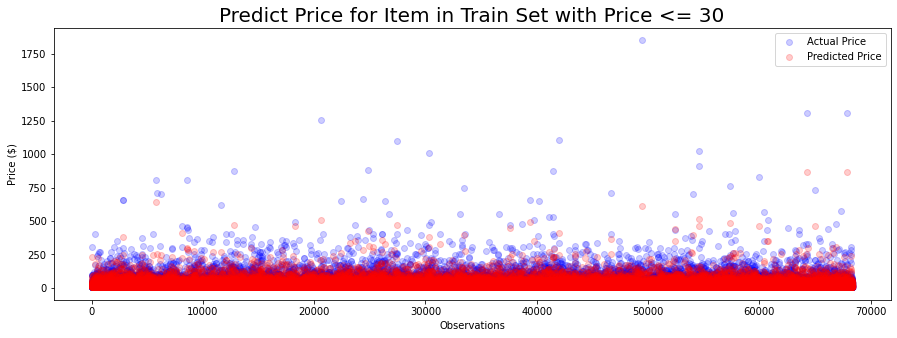

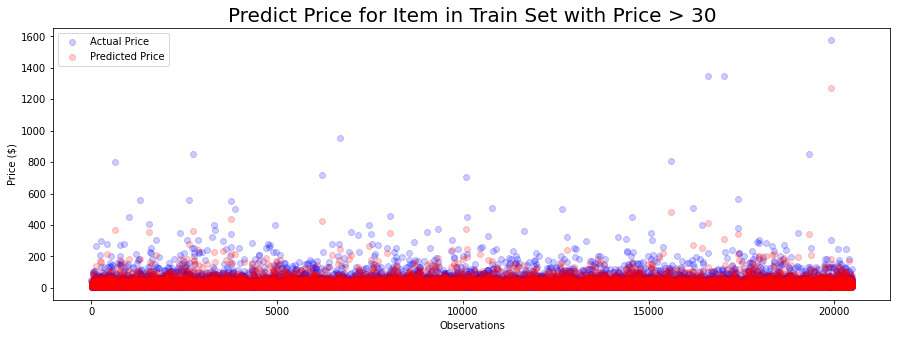

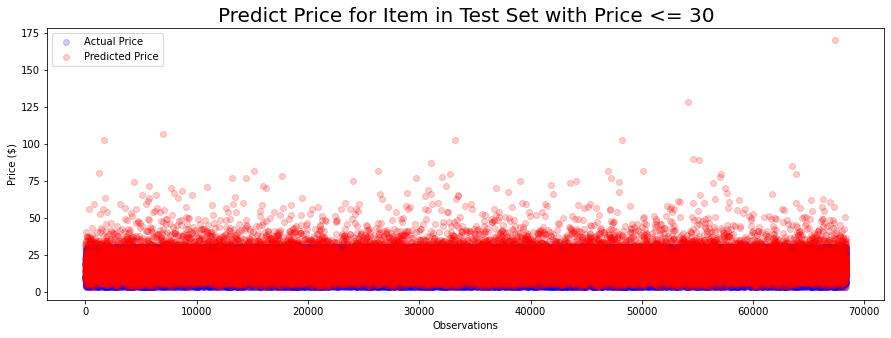

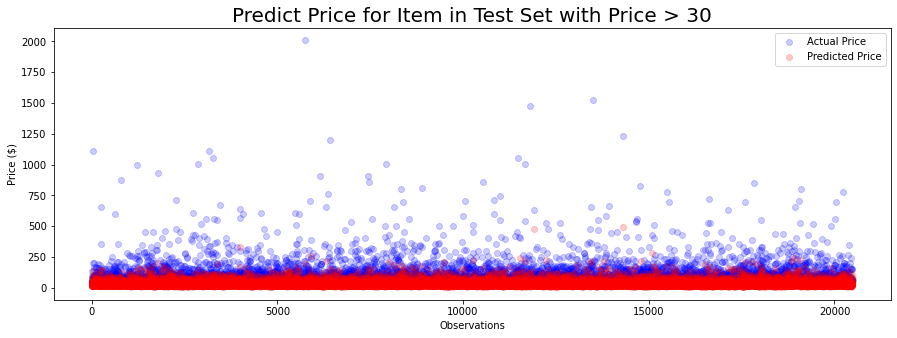

Max Percentage Difference: 208.35 ---- Original Price 3.00, Predict Price 9.25 
Min Percentage Difference: 0.00 ---- Original Price 5.00, Predict Price 5.00 
Max Percentage Difference: 208.35 ---- Original Price 3.00, Predict Price 9.25 
Min Percentage Difference: 0.00 ---- Original Price 5.00, Predict Price 5.00 
Max Percentage Difference: 80.01 ---- Original Price 1050.00, Predict Price 209.85 
Min Percentage Difference: 0.00 ---- Original Price 36.00, Predict Price 36.00 
Max Percentage Difference: 2465.58 ---- Original Price 5.00, Predict Price 128.28 
Min Percentage Difference: 0.00 ---- Original Price 6.00, Predict Price 6.00 
Max Percentage Difference: 2465.58 ---- Original Price 5.00, Predict Price 128.28 
Min Percentage Difference: 0.00 ---- Original Price 6.00, Predict Price 6.00 
Max Percentage Difference: 213.68 ---- Original Price 31.00, Predict Price 97.24 
Min Percentage Difference: 0.01 ---- Original Price 34.00, Predict Price 34.00 


In [31]:
ori_train_price, ori_test_price, pred_train_price, pred_test_price = get_ori_price(y_train, rf_train_pred, 
                                                                                   y_test,rf_test_pred)

result_df = reg_evaluation(ori_train_price, ori_test_price, pred_train_price, pred_test_price,  # origin price
               y_train, rf_train_pred, y_test, rf_test_pred,
               price_split=30,print_result = False)

In [32]:
result_df

,Max Percentage Diff,Min Percentage Diff,RMSLE,R^2,MAPE,MAE
All Train,208.349339,3.552714e-14,0.184494,0.938636,14.491812,4.895257
Train with Price <= 30,208.349339,3.552714e-14,0.147409,0.900189,13.305201,1.642371
Train with Price > 30,80.014653,7.391016e-04,0.273692,0.715863,18.431882,15.696278
All Test,2465.577640,1.524706e-12,0.501155,0.549946,41.823720,11.160710
Test with Price <= 30,2465.577640,1.524706e-12,0.399331,0.275092,42.424293,4.833099
Test with Price > 30,213.679440,6.286108e-03,0.746438,-1.078096,39.819357,32.278585


### Ridge Regressor - Hyperparameter From Sample Data

In [34]:
ridge_model = Ridge(max_iter=100, tol=0.05, alpha=6.0)
ridge_model.fit(x_skb_select_train, y_train)

Ridge(alpha=6.0, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      random_state=None, solver='auto', tol=0.05)

In [35]:
ridge_train_pred = ridge_model.predict(x_skb_select_train)
ridge_test_pred = ridge_model.predict(x_skb_select_test)

In [36]:
save_np_file(dir = "data", filename="select_k_best_ridge_train_pred.npy", data=ridge_train_pred)
save_np_file(dir = "data", filename="select_k_best_ridge_test_pred.npy", data=ridge_test_pred)

In [37]:
ridge_train_pred  = np.load("data/select_k_best_ridge_train_pred.npy")
ridge_test_pred  = np.load("data/select_k_best_ridge_test_pred.npy")

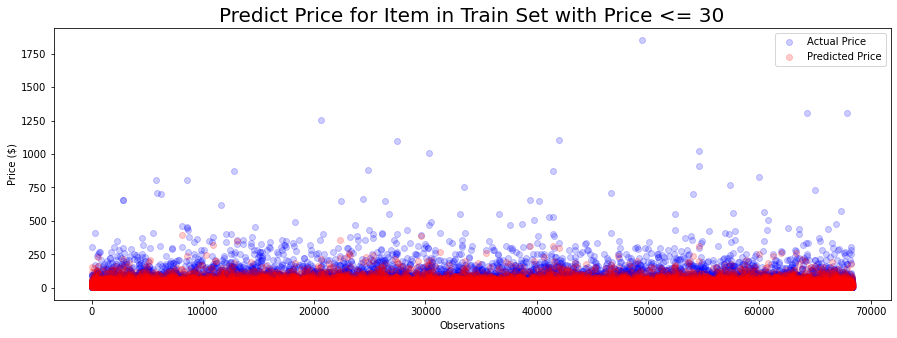

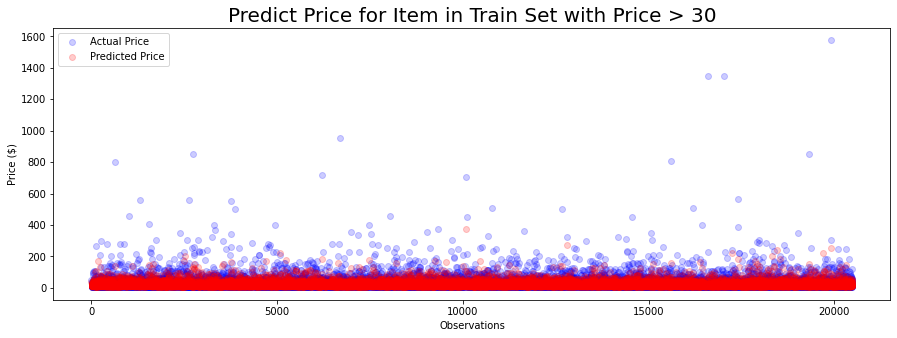

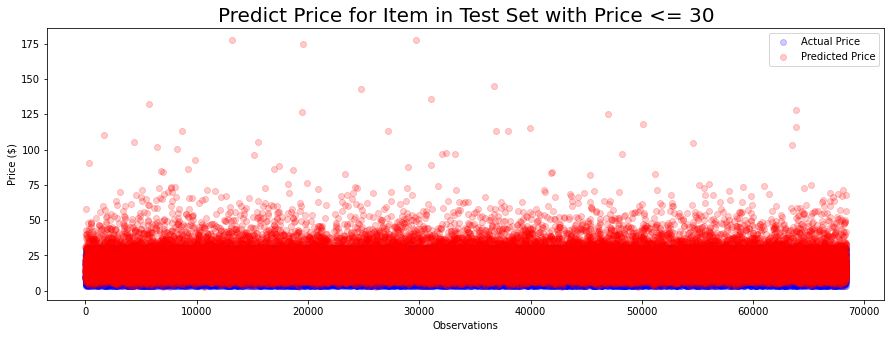

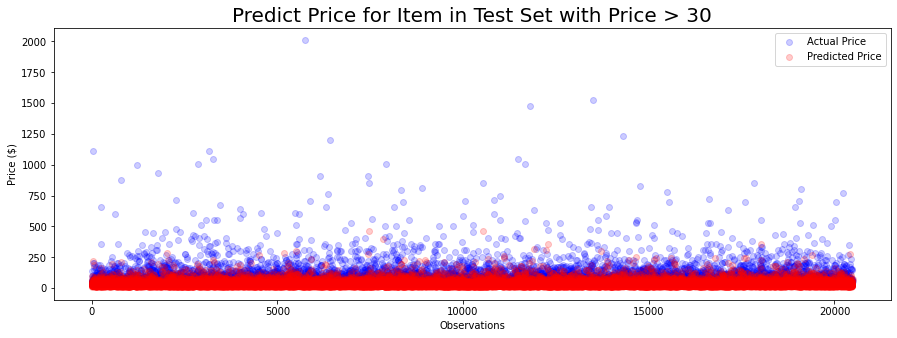

Max Percentage Difference: 2111.19 ---- Original Price 3.00, Predict Price 66.34 
Min Percentage Difference: 0.00 ---- Original Price 104.00, Predict Price 104.00 
Max Percentage Difference: 2111.19 ---- Original Price 3.00, Predict Price 66.34 
Min Percentage Difference: 0.00 ---- Original Price 26.00, Predict Price 26.00 
Max Percentage Difference: 490.28 ---- Original Price 34.00, Predict Price 200.70 
Min Percentage Difference: 0.00 ---- Original Price 104.00, Predict Price 104.00 
Max Percentage Difference: 1356.35 ---- Original Price 12.00, Predict Price 174.76 
Min Percentage Difference: 0.00 ---- Original Price 23.00, Predict Price 23.00 
Max Percentage Difference: 1356.35 ---- Original Price 12.00, Predict Price 174.76 
Min Percentage Difference: 0.00 ---- Original Price 23.00, Predict Price 23.00 
Max Percentage Difference: 495.09 ---- Original Price 31.00, Predict Price 184.48 
Min Percentage Difference: 0.01 ---- Original Price 46.00, Predict Price 46.01 


In [38]:
ori_train_price, ori_test_price, pred_train_price, pred_test_price = get_ori_price(y_train, ridge_train_pred, 
                                                                                   y_test,ridge_test_pred)

result_df = reg_evaluation(ori_train_price, ori_test_price, pred_train_price, pred_test_price,  # origin price
               y_train, ridge_train_pred, y_test, ridge_test_pred,
               price_split=30,print_result = False)

In [39]:
result_df

,Max Percentage Diff,Min Percentage Diff,RMSLE,R^2,MAPE,MAE
All Train,2111.191948,0.000356,0.530412,0.492802,47.015602,11.936537
Train with Price <= 30,2111.191948,0.001433,0.442076,0.102313,48.523189,5.794103
Train with Price > 30,490.280685,0.000356,0.752715,-1.149135,42.009744,32.332137
All Test,1356.346991,0.001924,0.536325,0.484563,47.726907,12.141730
Test with Price <= 30,1356.346991,0.001924,0.446711,0.092869,49.328974,5.844213
Test with Price > 30,495.089297,0.012866,0.762658,-1.169395,42.380140,33.159171
